In [49]:
from sklearn.cluster import KMeans
import pandas as pd

In [50]:
km_df = pd.read_csv('./data/Data-2029-05.csv', usecols=lambda col: col not in ['VitalDate', 'no', 'UserCode', 'GyroX', 'GyroY', 'GyroZ','Latitude','Longitude' ])
X = km_df.values

In [51]:
import numpy as np

# 데이터프레임에서 0을 NaN으로 대체
km_df.replace(0, np.nan, inplace=True)

# 각 열의 평균 계산
column_means = km_df.mean()

# NaN을 평균값으로 대체
km_df.fillna(column_means, inplace=True)

# 대체된 값들을 다시 배열로 변환
X = km_df.values
print(km_df)

       Heartbeat  Temperature       Spo2
0     102.000000          365  96.000000
1     102.000000          365  96.000000
2     102.000000          365  96.000000
3     102.000000          365  96.000000
4      88.876682          362  97.246637
...          ...          ...        ...
1284   88.876682          357  97.246637
1285   88.876682          364  97.246637
1286   88.876682          362  97.246637
1287   88.876682          357  97.246637
1288   99.000000          368  98.000000

[1289 rows x 3 columns]


In [52]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
clusters = kmeans.fit_predict(X)

print(clusters)

[0 0 0 ... 0 0 0]


In [53]:
# # 라벨링
# labels = []
# for i in range(len(clusters)):
#     if clusters[i] == 0:
#         labels.append('A')
#     # elif clusters[i] == 1:
#     #     labels.append('B')
#     else:
#         labels.append('C')
#
# print(labels)

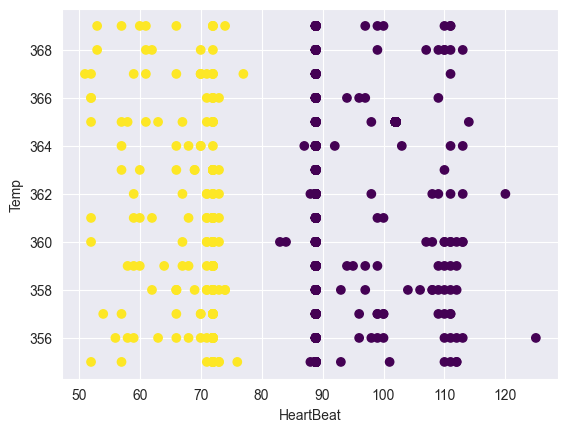

In [54]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis')
plt.xlabel('HeartBeat')
plt.ylabel('Temp')
\plt.show()

라벨링이 되어있지 않은 km_df의 t-SNE 결과를 시각화
km_df는 X로 변환 -> t-SNE를 수행 -> X_tsne에 2차원 좌표로 변환된 결과가 저장
X_tsne[:, 0] : X_tsne의 모든 데이터 포인트에 대한 x 좌표
X_tsne[:, 1] : y 좌표
c 매개변수 : 통해 clusters 라벨에 따라 각 데이터 포인트의 색상을 지정

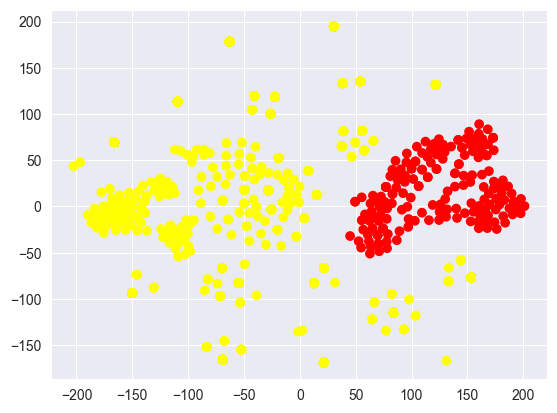

In [57]:
from sklearn.manifold import TSNE

# 데이터프레임에서 numpy 배열로 변환
X = km_df.values

# t-SNE를 사용하여 2차원으로 축소된 데이터 포인트의 좌표 계산
X_tsne = TSNE(n_components=2, random_state=0).fit_transform(X)

# 산점도를 그리고 데이터 포인트를 시각화
# 각 데이터 포인트의 x 좌표는 X_tsne[:, 0]에서 가져오고, y 좌표는 X_tsne[:, 1]에서 가져옴
# clusters 라벨에 따라 데이터 포인트의 색상을 지정하여 시각화
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=['yellow' if label == 0 else 'red' for label in clusters])
plt.show()

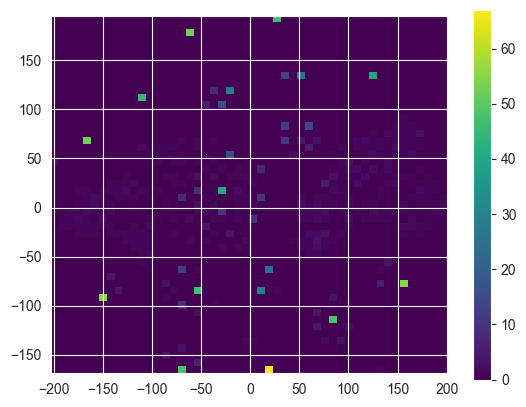

In [56]:
heatmap, xedges, yedges = np.histogram2d(X_tsne[:, 0], X_tsne[:, 1], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.colorbar()
plt.show()
